In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [2]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [3]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [4]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [5]:
train_labels = []
train_samples = []

In [6]:
for i in range(50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    # The ~5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    # The ~95% of older individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [7]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [9]:
model.fit(
      x=scaled_train_samples
    , y=train_labels
    , validation_split=0.1
    , batch_size=10
    , epochs=30
    , verbose=2
)

Epoch 1/30
189/189 - 5s - loss: 0.6533 - accuracy: 0.5587 - val_loss: 0.6423 - val_accuracy: 0.6048 - 5s/epoch - 28ms/step
Epoch 2/30
189/189 - 2s - loss: 0.6377 - accuracy: 0.6254 - val_loss: 0.6254 - val_accuracy: 0.6476 - 2s/epoch - 9ms/step
Epoch 3/30
189/189 - 1s - loss: 0.6172 - accuracy: 0.6931 - val_loss: 0.6041 - val_accuracy: 0.7095 - 1s/epoch - 7ms/step
Epoch 4/30
189/189 - 2s - loss: 0.5961 - accuracy: 0.7302 - val_loss: 0.5839 - val_accuracy: 0.7429 - 2s/epoch - 11ms/step
Epoch 5/30
189/189 - 2s - loss: 0.5756 - accuracy: 0.7587 - val_loss: 0.5639 - val_accuracy: 0.7714 - 2s/epoch - 9ms/step
Epoch 6/30
189/189 - 0s - loss: 0.5542 - accuracy: 0.7772 - val_loss: 0.5429 - val_accuracy: 0.7810 - 401ms/epoch - 2ms/step
Epoch 7/30
189/189 - 0s - loss: 0.5324 - accuracy: 0.7995 - val_loss: 0.5217 - val_accuracy: 0.8000 - 370ms/epoch - 2ms/step
Epoch 8/30
189/189 - 0s - loss: 0.5101 - accuracy: 0.8180 - val_loss: 0.5003 - val_accuracy: 0.8048 - 334ms/epoch - 2ms/step
Epoch 9/30
18

In [10]:
test_labels =  []
test_samples = []

for i in range(10):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

## **Evaluating a test set**

In [11]:
predictions = model.predict(
      x=scaled_test_samples
    , batch_size=10
    , verbose=0
)  

In [12]:
for i in predictions:
    print(i)

[0.9345984  0.06540153]
[0.88335973 0.11664035]
[0.07853488 0.92146516]
[0.9509431  0.04905688]
[0.09688574 0.90311426]
[0.65565777 0.3443421 ]
[0.02322057 0.9767794 ]
[0.34942278 0.6505772 ]
[0.9509432  0.04905689]
[0.21217008 0.7878299 ]
[0.0872751 0.9127249]
[0.02012413 0.97987586]
[0.02322057 0.9767794 ]
[0.21217008 0.7878299 ]
[0.72892237 0.27107763]
[0.6292384  0.37076163]
[0.0872751 0.9127249]
[0.51717806 0.48282194]
[0.9264385  0.07356149]
[0.5741602  0.42583978]
[0.13156885 0.8684312 ]
[0.54581916 0.4541808 ]
[0.9134442  0.08655575]
[0.05727023 0.9427297 ]
[0.29907995 0.70092005]
[0.02696814 0.9730319 ]
[0.03434465 0.96565545]
[0.92643845 0.07356149]
[0.25316775 0.74683225]
[0.02159531 0.9784047 ]
[0.9511026 0.0488973]
[0.04169988 0.95830005]
[0.27553162 0.7244684 ]
[0.05150589 0.948494  ]
[0.9514203  0.04857961]
[0.13156885 0.8684312 ]
[0.9507831  0.04921696]
[0.02696814 0.9730319 ]
[0.04169988 0.95830005]
[0.03770738 0.9622926 ]
[0.02911817 0.97088176]
[0.04631395 0.95368606

In [13]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [14]:
for i in rounded_predictions:
    print(i)

0
0
1
0
1
0
1
1
0
1
1
1
1
1
0
0
1
0
0
0
1
0
0
1
1
1
1
0
1
1
0
1
1
1
0
1
0
1
1
1
1
1
0
0
0
0
1
0
1
1
0
0
1
0
1
1
0
1
1
1
0
1
0
1
0
0
1
1
1
0
0
0
1
1
1
1
1
0
0
0
0
1
1
0
1
1
1
1
0
0
0
0
1
1
0
1
1
0
0
0
0
1
1
0
1
1
1
0
1
1
1
1
1
0
1
0
1
0
1
0
0
0
0
0
1
1
0
0
1
1
1
0
0
0
0
1
1
1
1
1
1
0
1
0
1
0
0
1
0
0
1
0
0
1
0
1
1
1
1
1
0
1
0
0
0
0
1
0
1
1
0
0
1
0
0
0
0
1
0
1
0
0
1
1
0
0
0
1
1
0
0
0
0
0
1
1
0
1
1
0
0
1
1
0
0
1
1
0
0
0
0
0
1
0
1
1
1
1
1
0
0
1
0
1
0
1
0
1
1
0
0
1
0
0
1
0
1
1
0
0
1
0
0
1
1
1
0
1
0
1
0
1
1
1
0
1
1
1
1
0
0
0
0
1
0
0
0
1
0
1
1
0
1
0
1
0
0
0
0
1
0
0
1
0
1
1
1
1
1
0
1
1
1
0
1
1
0
1
0
0
0
1
1
1
1
1
0
0
1
1
0
1
1
1
0
0
1
1
1
1
1
0
0
1
0
1
0
1
0
0
0
1
0
1
1
0
1
0
1
1
1
0
0
0
0
1
0
0
1
1
1
1
0
1
1
1
0
1
1
1
0
0
0
1
1
0
1
1
0
1
0
1
0
0
1
0
1
1
1
0
0
0
0
1
0
0
0
1
1
1
0
1
1
1
1
1
0
0
1
0
0
0
0
0
1
0
0
0
0
0
1
1
1
1
1
0
0
0
0
0


In [15]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [16]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [19]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [18]:
cm_plot_labels = ['no_side_effects','had_side_effects']

Confusion matrix, without normalization
[[193  17]
 [ 10 200]]


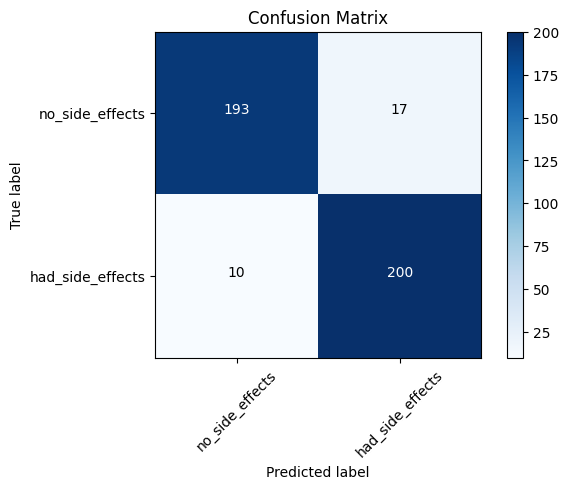

In [20]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')